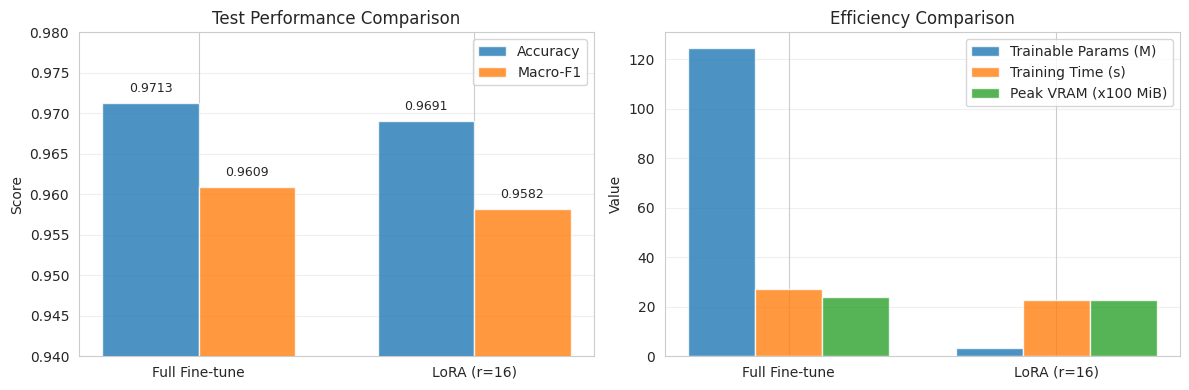

COMPARISON: Full Fine-tuning vs LoRA (r=16)
Metric                         Full            LoRA            Difference
------------------------------------------------------------
Test Accuracy                  0.9713          0.9691          -0.0022
Test Macro-F1                  0.9609          0.9582          -0.0027
Trainable Params (M)           124.65          3.25            -121.40
Trainable %                    100.00          2.54            -97.46
Training Time (s)              27.0            22.9            -4.1
Peak VRAM (MiB)                2400            2266            -134

Parameter Reduction: 97.39%
Performance Drop: 0.27% (F1)


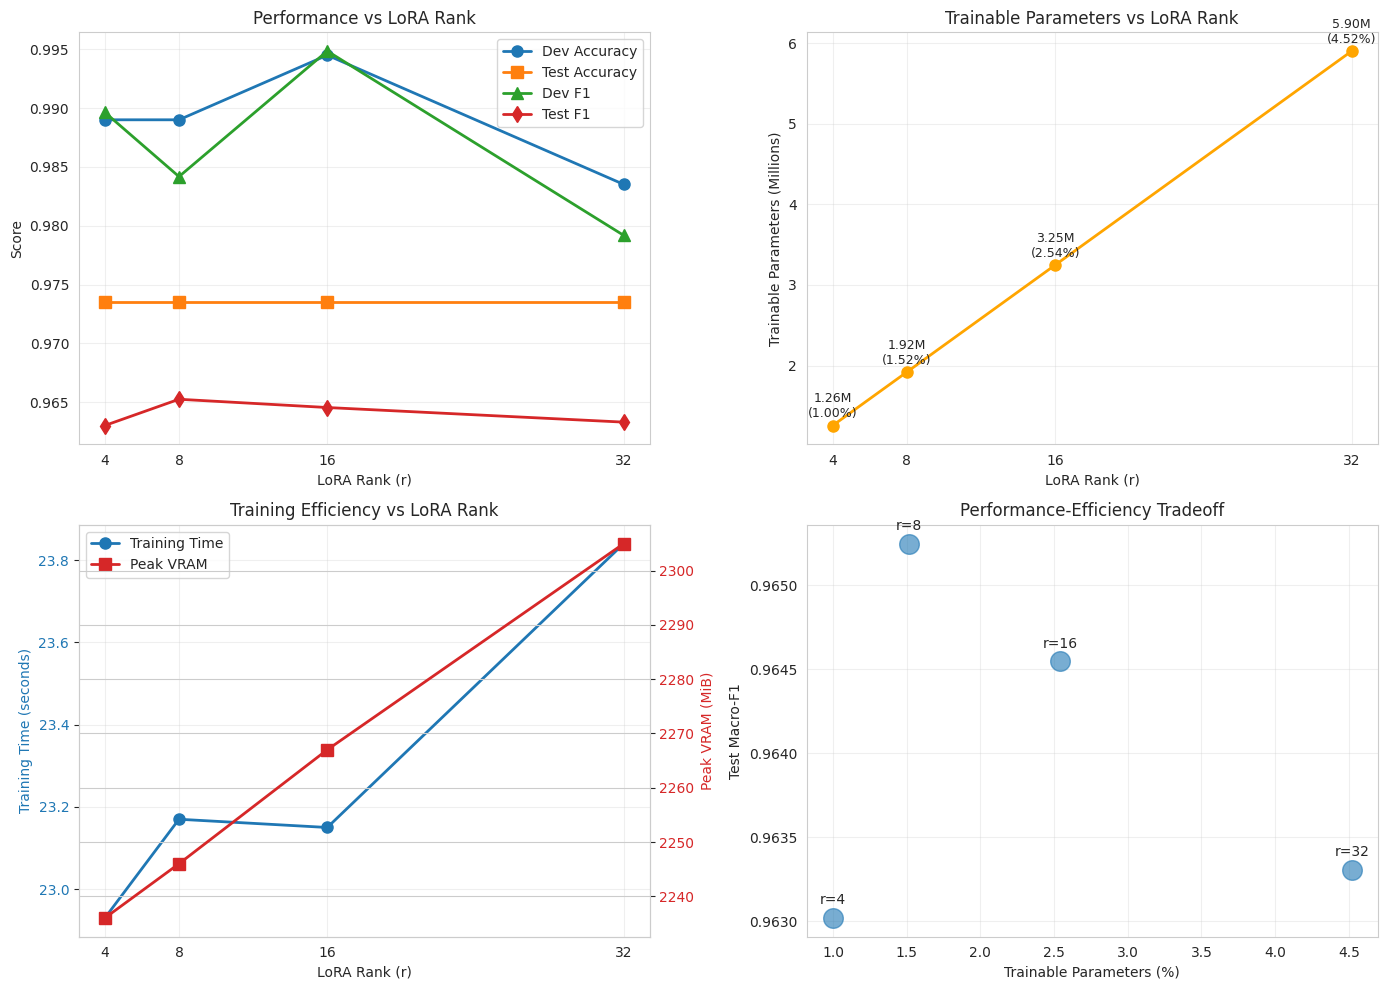


LORA ABLATION STUDY RESULTS
 r  trainable_params  trainable_pct  dev_accuracy   dev_f1  test_accuracy  test_f1  training_time  peak_vram
 4           1256451          0.998      0.989011 0.989643        0.97351 0.963018          22.93       2236
 8           1920003          1.517      0.989011 0.984180        0.97351 0.965250          23.17       2246
16           3247107          2.539      0.994505 0.994856        0.97351 0.964547          23.15       2267
32           5901315          4.520      0.983516 0.979179        0.97351 0.963304          23.84       2305

BEST LORA CONFIGURATION
Rank (r): 8
Test Accuracy: 0.9735
Test Macro-F1: 0.9653
Trainable Params: 1,920,003 (1.52%)
Training Time: 23.2s
Peak VRAM: 2246 MiB

FINAL SUMMARY
        Method  Test F1  Params (M)  Params (%)  Time (s)
Full Fine-tune 0.960900  124.647939     100.000     27.00
    LoRA (r=4) 0.963018    1.256451       0.998     22.93
    LoRA (r=8) 0.965250    1.920003       1.517     23.17
   LoRA (r=16) 0.9645

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

# Results data
full_finetune = {
    "method": "Full Fine-tuning",
    "trainable_params": 124647939,
    "trainable_pct": 100.00,
    "dev_accuracy": 0.9835,
    "dev_f1": 0.9790,
    "test_accuracy": 0.9713,
    "test_f1": 0.9609,
    "training_time": 27.0,
    "peak_vram": 2400,  # Estimated
}

lora_main = {
    "method": "LoRA (r=16)",
    "trainable_params": 3247107,
    "trainable_pct": 2.54,
    "dev_accuracy": 0.9835,
    "dev_f1": 0.9846,
    "test_accuracy": 0.9691,
    "test_f1": 0.9582,
    "training_time": 22.9,
    "peak_vram": 2266,
}

lora_ablation = [
    {"r": 4, "trainable_params": 1256451, "trainable_pct": 0.998, 
     "dev_accuracy": 0.989011, "dev_f1": 0.989643, 
     "test_accuracy": 0.97351, "test_f1": 0.963018, 
     "training_time": 22.93, "peak_vram": 2236},
    {"r": 8, "trainable_params": 1920003, "trainable_pct": 1.517, 
     "dev_accuracy": 0.989011, "dev_f1": 0.984180, 
     "test_accuracy": 0.97351, "test_f1": 0.965250, 
     "training_time": 23.17, "peak_vram": 2246},
    {"r": 16, "trainable_params": 3247107, "trainable_pct": 2.539, 
     "dev_accuracy": 0.994505, "dev_f1": 0.994856, 
     "test_accuracy": 0.97351, "test_f1": 0.964547, 
     "training_time": 23.15, "peak_vram": 2267},
    {"r": 32, "trainable_params": 5901315, "trainable_pct": 4.520, 
     "dev_accuracy": 0.983516, "dev_f1": 0.979179, 
     "test_accuracy": 0.97351, "test_f1": 0.963304, 
     "training_time": 23.84, "peak_vram": 2305},
]

# 1. Performance comparison: Full vs LoRA
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

methods = ['Full Fine-tune', 'LoRA (r=16)']
test_acc = [full_finetune['test_accuracy'], lora_main['test_accuracy']]
test_f1 = [full_finetune['test_f1'], lora_main['test_f1']]

x = np.arange(len(methods))
width = 0.35

axes[0].bar(x - width/2, test_acc, width, label='Accuracy', alpha=0.8)
axes[0].bar(x + width/2, test_f1, width, label='Macro-F1', alpha=0.8)
axes[0].set_ylabel('Score')
axes[0].set_title('Test Performance Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods)
axes[0].legend()
axes[0].set_ylim([0.94, 0.98])
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(test_acc):
    axes[0].text(i - width/2, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(test_f1):
    axes[0].text(i + width/2, v + 0.001, f'{v:.4f}', ha='center', va='bottom', fontsize=9)

# Efficiency comparison
params = [full_finetune['trainable_params']/1e6, lora_main['trainable_params']/1e6]
time = [full_finetune['training_time'], lora_main['training_time']]
vram = [full_finetune['peak_vram'], lora_main['peak_vram']]

ax2 = axes[1]
x2 = np.arange(len(methods))
width2 = 0.25

ax2.bar(x2 - width2, params, width2, label='Trainable Params (M)', alpha=0.8)
ax2.bar(x2, time, width2, label='Training Time (s)', alpha=0.8)
ax2.bar(x2 + width2, [v/100 for v in vram], width2, label='Peak VRAM (x100 MiB)', alpha=0.8)

ax2.set_ylabel('Value')
ax2.set_title('Efficiency Comparison')
ax2.set_xticks(x2)
ax2.set_xticklabels(methods)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("="*60)
print("COMPARISON: Full Fine-tuning vs LoRA (r=16)")
print("="*60)
print(f"{'Metric':<30} {'Full':<15} {'LoRA':<15} {'Difference'}")
print("-"*60)
print(f"{'Test Accuracy':<30} {full_finetune['test_accuracy']:<15.4f} {lora_main['test_accuracy']:<15.4f} {lora_main['test_accuracy']-full_finetune['test_accuracy']:+.4f}")
print(f"{'Test Macro-F1':<30} {full_finetune['test_f1']:<15.4f} {lora_main['test_f1']:<15.4f} {lora_main['test_f1']-full_finetune['test_f1']:+.4f}")
print(f"{'Trainable Params (M)':<30} {full_finetune['trainable_params']/1e6:<15.2f} {lora_main['trainable_params']/1e6:<15.2f} {(lora_main['trainable_params']-full_finetune['trainable_params'])/1e6:+.2f}")
print(f"{'Trainable %':<30} {full_finetune['trainable_pct']:<15.2f} {lora_main['trainable_pct']:<15.2f} {lora_main['trainable_pct']-full_finetune['trainable_pct']:+.2f}")
print(f"{'Training Time (s)':<30} {full_finetune['training_time']:<15.1f} {lora_main['training_time']:<15.1f} {lora_main['training_time']-full_finetune['training_time']:+.1f}")
print(f"{'Peak VRAM (MiB)':<30} {full_finetune['peak_vram']:<15.0f} {lora_main['peak_vram']:<15.0f} {lora_main['peak_vram']-full_finetune['peak_vram']:+.0f}")
print("="*60)
print(f"\nParameter Reduction: {100*(1-lora_main['trainable_params']/full_finetune['trainable_params']):.2f}%")
print(f"Performance Drop: {100*(full_finetune['test_f1']-lora_main['test_f1']):.2f}% (F1)")
print("="*60)

# 2. LoRA ablation study
df_ablation = pd.DataFrame(lora_ablation)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 2.1 Performance vs r
axes[0, 0].plot(df_ablation['r'], df_ablation['dev_accuracy'], 'o-', label='Dev Accuracy', linewidth=2, markersize=8)
axes[0, 0].plot(df_ablation['r'], df_ablation['test_accuracy'], 's-', label='Test Accuracy', linewidth=2, markersize=8)
axes[0, 0].plot(df_ablation['r'], df_ablation['dev_f1'], '^-', label='Dev F1', linewidth=2, markersize=8)
axes[0, 0].plot(df_ablation['r'], df_ablation['test_f1'], 'd-', label='Test F1', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('LoRA Rank (r)')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Performance vs LoRA Rank')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)
axes[0, 0].set_xticks(df_ablation['r'])

# 2.2 Trainable params vs r
axes[0, 1].plot(df_ablation['r'], df_ablation['trainable_params']/1e6, 'o-', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_xlabel('LoRA Rank (r)')
axes[0, 1].set_ylabel('Trainable Parameters (Millions)')
axes[0, 1].set_title('Trainable Parameters vs LoRA Rank')
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xticks(df_ablation['r'])
for i, row in df_ablation.iterrows():
    axes[0, 1].text(row['r'], row['trainable_params']/1e6 + 0.1, 
                    f"{row['trainable_params']/1e6:.2f}M\n({row['trainable_pct']:.2f}%)", 
                    ha='center', fontsize=9)

# 2.3 Training time and memory vs r
ax1 = axes[1, 0]
ax2 = ax1.twinx()

color1 = 'tab:blue'
color2 = 'tab:red'

ax1.plot(df_ablation['r'], df_ablation['training_time'], 'o-', linewidth=2, markersize=8, color=color1, label='Training Time')
ax1.set_xlabel('LoRA Rank (r)')
ax1.set_ylabel('Training Time (seconds)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_ablation['r'])
ax1.grid(alpha=0.3)

ax2.plot(df_ablation['r'], df_ablation['peak_vram'], 's-', linewidth=2, markersize=8, color=color2, label='Peak VRAM')
ax2.set_ylabel('Peak VRAM (MiB)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
ax1.set_title('Training Efficiency vs LoRA Rank')

# 2.4 Performance-efficiency tradeoff
axes[1, 1].scatter(df_ablation['trainable_pct'], df_ablation['test_f1'], s=200, alpha=0.6)
for i, row in df_ablation.iterrows():
    axes[1, 1].annotate(f"r={int(row['r'])}", 
                       (row['trainable_pct'], row['test_f1']),
                       textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
axes[1, 1].set_xlabel('Trainable Parameters (%)')
axes[1, 1].set_ylabel('Test Macro-F1')
axes[1, 1].set_title('Performance-Efficiency Tradeoff')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("LORA ABLATION STUDY RESULTS")
print("="*60)
print(df_ablation.to_string(index=False))
print("="*60)

# 3. Best configuration analysis
best_f1_idx = df_ablation['test_f1'].idxmax()
best_config = df_ablation.iloc[best_f1_idx]

print("\n" + "="*60)
print("BEST LORA CONFIGURATION")
print("="*60)
print(f"Rank (r): {int(best_config['r'])}")
print(f"Test Accuracy: {best_config['test_accuracy']:.4f}")
print(f"Test Macro-F1: {best_config['test_f1']:.4f}")
print(f"Trainable Params: {best_config['trainable_params']:,.0f} ({best_config['trainable_pct']:.2f}%)")
print(f"Training Time: {best_config['training_time']:.1f}s")
print(f"Peak VRAM: {best_config['peak_vram']:.0f} MiB")
print("="*60)

# 4. Summary table
print("\n" + "="*60)
print("FINAL SUMMARY")
print("="*60)

summary_data = {
    'Method': ['Full Fine-tune', 'LoRA (r=4)', 'LoRA (r=8)', 'LoRA (r=16)', 'LoRA (r=32)'],
    'Test F1': [full_finetune['test_f1']] + [x['test_f1'] for x in lora_ablation],
    'Params (M)': [full_finetune['trainable_params']/1e6] + [x['trainable_params']/1e6 for x in lora_ablation],
    'Params (%)': [full_finetune['trainable_pct']] + [x['trainable_pct'] for x in lora_ablation],
    'Time (s)': [full_finetune['training_time']] + [x['training_time'] for x in lora_ablation],
}

df_summary = pd.DataFrame(summary_data)
print(df_summary.to_string(index=False))
print("="*60)

print("\nKEY FINDINGS:")
print(f"1. LoRA achieves {100*(lora_main['test_f1']/full_finetune['test_f1']):.2f}% of full fine-tuning performance")
print(f"2. LoRA uses only {lora_main['trainable_pct']:.2f}% trainable parameters")
print(f"3. Best LoRA rank: r={int(best_config['r'])} (Test F1: {best_config['test_f1']:.4f})")
print(f"4. Training time is similar across all methods (~23s)")
print(f"5. Memory usage increases slightly with LoRA rank (2236-2305 MiB)")
print("="*60)